# Data Analysis for Moonsama Carnage

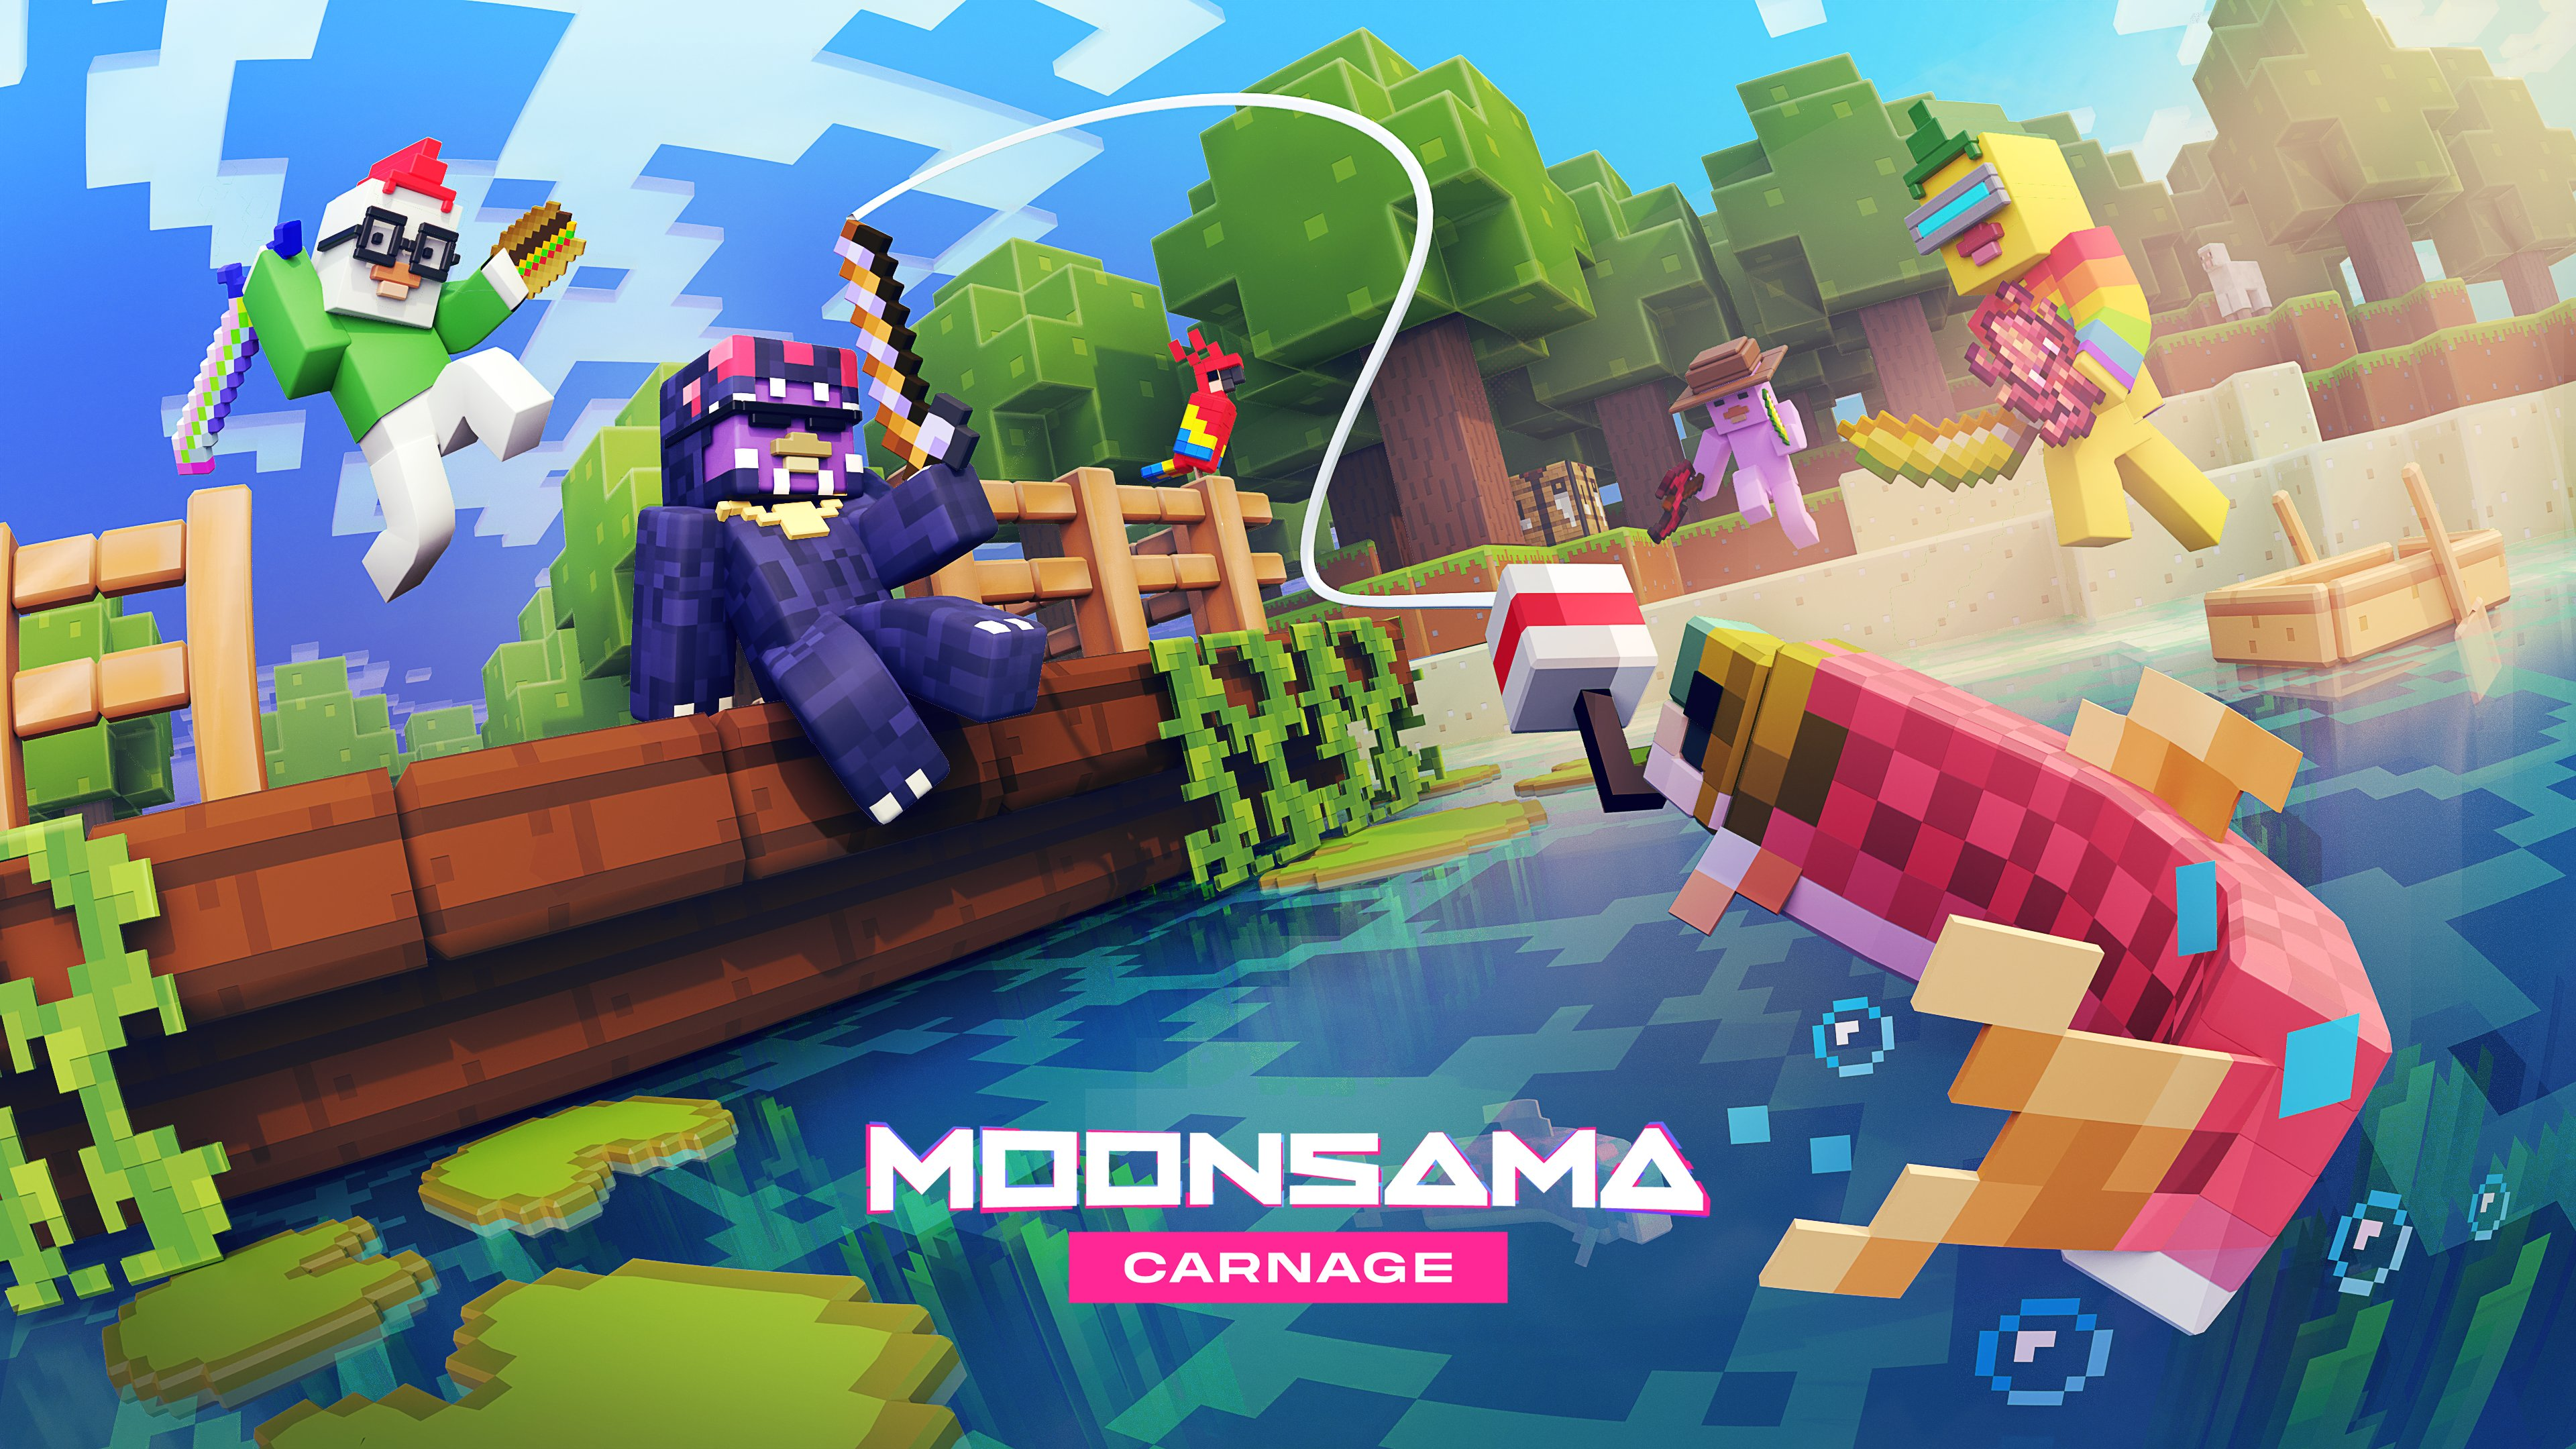

## Introduction About Moonsama Carnage and its Technology




The Moonsama Minecraft Metaverse is a usable, breakthrough example that illustrates the powers and applications of Multiverse Bridge technology, as described in this [litepaper](https://wiki.moonsama.com/litepaper). The Multiverse Bridge is a Web 3.0 tool that makes possible to connect on-chain assets to both on-chain and off-chain applications in the metaverses. Using this technology, we are able to import our on-chain assets into a metaverse. Examples of this can be importing an NFT into a game, thus creating a unique character or skin, or exporting game items into a blockchain, like in-game currency becoming an ERC-20 when imported on-chain. 

#### So, what's Carnage?

Carnage is a Sunday event created to enjoy playing against others and getting resources (mining, fighting–or both). This event consists of playing Minecraft for 2 hours while trying to survive in a hostile environment, and all of the players are committed to surviving until the end of the game. After the conclusion of each event, all the collected resources will be integrated into the blockchain. Here, players may claim and trade resources. The trade happens in the marketplace which you can visit here: [Moonsama Marketplace](https://marketplace.moonsama.com/). The trades are in [$MOVR](https://coinmarketcap.com/currencies/moonriver), which is the cryptocurrency of the Moonriver Network.

If you want to know more about moonsama, I suggest visiting [twitter](https://twitter.com/MoonsamaNFT), and its [original website](https://moonsama.com).

## Roadmap

0. Understanding the features
        - What are the features we are going to work with?
        - Considerations
    
1. Gathering data
        - Reading json files
    
2. Building the dataset
        - Creating a dataframe with the views through dictionaries
    
3. Inspecting the dataset

4. Performing Exploratory Data Analysis
    
    a. General Aspects of Carnage
        - Correlation between the features
        - How many players so far?
        - Amount of players in each carnage
        - Amount of new players in each carnage
        - Amount of session of each player 
        - How about mining?
            - Total amount of mined resources (personal view)
            - Total amount of obtained resources (final view)
        - Gganbu of each resource in each carnage
    b. Going deeper into the player's analysis
        - Performance in the game
        - Moonsamas/VIP tickets or passes
        - Can we clasify players into groups? (noob/safe mining/butcher)
        
5. Deeper analysis of resources considering external events

    a. How did the events condition behaviors within mining?
    
    b. Effects of having a no-reward session
        - We can explore which is the type of people that participated since we know how many were playing
        
6. Fun stuff with strings
    
    a. Similarities in the user name
        - Comparing usernames
        - Can we identify words in the username? 
        
7. Wrapping up all the information

## 0. Understanding the features

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| username     | Name of the player                                                                                          |
| date          | Date of the event                                                                                           |
| exp           | Experience gained in the game                                                                               |
| wood          | Amount of wood collected                                                                                    |
| stone         | Amount of stone collected                                                                                   |
| iron          | Amount of iron collected                                                                                    |
| gold          | Amount of gold collected                                                                                    |
| grain         | Amount of grain collected                                                                                   |
| string        | Amount of string collected                                                                                  |
| fish_specimen | Amount of fish_specimen collected                                                                           |
| moonstone     | Amount of moonstone collected                                                                                             

For the purpose of this analytic project, the data was collected from https://mcapi.moonsama.com/game. In the section Game Stats, we click on every week to get data from the personal and final view.

Both are independent files with the same features, the only difference is that Personal View has just what the player collected at the end of the Carnage event, which is to say 20% of the collected resources. On the other hand, the final view has Gganbu integrated, which means that the 80% is going to be distributed among the players.

## 1. Gathering data

### Set-up

In [1]:
import os, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline

### Reading JSON files

In [2]:
format_data = '%d/%m/%Y'
path_to_json = './personal_view/'
path_to_json2 = './final_view/'

json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
json_files2 = [pos_json for pos_json in os.listdir(path_to_json2) if pos_json.endswith('.json')]

In [3]:
# Checking files
json_files2

['017_carnage.json',
 '018_carnage.json',
 '019_carnage.json',
 '020_carnage.json',
 '021_carnage.json',
 '022_carnage.json',
 '023_carnage.json',
 '024_carnage.json',
 '025_carnage.json',
 '026_carnage.json',
 '027_carnage.json',
 '028_carnage.json',
 '029_carnage.json',
 '030_carnage.json',
 '031_carnage.json',
 '032_carnage.json']

## 2. Building the dataset

### Creating dictionaries to store JSONs

In [4]:
# for personal view
d = {}
for name in json_files:
    d[name] = pd.DataFrame()

# for final view    
d2 = {}
for name in json_files2:
    d2[name] = pd.DataFrame()

In [5]:
# filling out dictionaries

sundays = ['17/04/2022','24/04/2022','01/05/2022','08/05/2022','15/05/2022','22/05/2022'
           ,'29/05/2022','05/06/2022','12/06/2022','19/06/2022','26/06/2022','03/07/2022','10/07/2022','17/07/2022','24/07/2022','31/07/2022']

weeks = list(range(17,17+len(sundays)))


for i in range(0,len(json_files)):
    d[json_files[i]] = pd.read_json(path_to_json+json_files[i]).T
    d[json_files[i]] = d[json_files[i]][0].apply(pd.Series, dtype='float64')
    d[json_files[i]] = d[json_files[i]].reset_index()
    d[json_files[i]]['date'] = datetime.strptime(sundays[i], format_data)
    d[json_files[i]]['week_n'] = weeks[i]

for i in range(0,len(json_files2)):
    d2[json_files2[i]] = pd.read_json(path_to_json2+json_files2[i]).T
    d2[json_files2[i]] = d2[json_files2[i]][0].apply(pd.Series, dtype='float64')
    d2[json_files2[i]] = d2[json_files2[i]].reset_index()
    d2[json_files2[i]]['date'] = datetime.strptime(sundays[i], format_data)
    d2[json_files2[i]]['week_n'] = weeks[i]

### Concatenating all the dataframes in df and df2 (for personal view and final view)

In [6]:
# Concatenating all dataframes

df_initial = d[json_files[0]]
for i in range(0,len(json_files)-1):
    if i == 0:
        df = pd.concat([df_initial, d[json_files[i+1]]], sort=False).replace(np.nan, 0)
    else:
        df = pd.concat([df, d[json_files[i+1]]], sort=False).replace(np.nan, 0)
        
df_initial2 = d2[json_files2[0]]
for i in range(0,len(json_files2)-1):
    if i == 0:
        df2 = pd.concat([df_initial2, d2[json_files2[i+1]]], sort=False).replace(np.nan, 0)
    else:
        df2 = pd.concat([df2, d2[json_files2[i+1]]], sort=False).replace(np.nan, 0)

### Merging Final View with Personal View 

In [7]:
# Personal View and Final View merged (columns that ends with x are from final view and y from personal view)

fvpv = df2.merge(df, on=['index','week_n'], how='outer', indicator=True) # there's 3 cases where we have final data that isn't in the personal view
fvpv = fvpv.replace(np.nan, 0)

fvpv['date_x'] = fvpv['date_x'].apply(lambda x: x.strftime("%m/%d/%Y"))

### Creating more columns to play with

In [8]:
# Received gganbu

fvpv['gganbu_wood'] = abs(round(fvpv['wood_x'] - fvpv['wood_y'], 5))
fvpv['gganbu_stone'] = abs(round(fvpv['stone_x'] - fvpv['stone_y'], 5))
fvpv['gganbu_iron'] = abs(round(fvpv['iron_x'] - fvpv['iron_y'], 5))
fvpv['gganbu_exp'] = abs(round(fvpv['exp_x'] - fvpv['exp_y'], 5))
fvpv['gganbu_grain'] = abs(round(fvpv['grain_x'] - fvpv['grain_y'], 5))
fvpv['gganbu_gold'] = abs(round(fvpv['gold_x'] - fvpv['gold_y'], 5))
fvpv['gganbu_string'] = abs(round(fvpv['string_x'] - fvpv['string_y'], 5))
fvpv['gganbu_fish'] = abs(round(fvpv['fish_specimen_x'] - fvpv['fish_specimen_y'], 5))
fvpv['gganbu_moonstone'] = abs(round(fvpv['moonstone_x'] - fvpv['moonstone_y'], 5))

In [9]:
# Creating a flag (binary) to identify if a player mined or not an specific resource (using personal view)

def doItBin(x):
    if x > 0:
        return 1
    else:
        return 0


fvpv['b_wood'] = fvpv['wood_y'].apply(lambda x: doItBin(x))
fvpv['b_stone'] = fvpv['stone_y'].apply(lambda x: doItBin(x))
fvpv['b_iron'] = fvpv['iron_y'].apply(lambda x: doItBin(x))
fvpv['b_exp'] = fvpv['exp_y'].apply(lambda x: doItBin(x))
fvpv['b_grain'] = fvpv['grain_y'].apply(lambda x: doItBin(x))
fvpv['b_gold'] = fvpv['gold_y'].apply(lambda x: doItBin(x))
fvpv['b_string'] = fvpv['string_y'].apply(lambda x: doItBin(x))
fvpv['b_fish'] = fvpv['fish_specimen_y'].apply(lambda x: doItBin(x))
fvpv['b_moonstone'] = fvpv['moonstone_y'].apply(lambda x: doItBin(x))

fvpv['n_each_rss'] = fvpv[['b_wood','b_stone','b_iron','b_exp','b_grain','b_gold','b_string','b_fish','b_moonstone']].sum(axis=1)

In [10]:
# Last but not least, renaming index by username
fvpv.rename(columns={'index':'username'}, inplace=True)

## 3. Inspecting the dataset

In [11]:
fvpv.head()

,username,exp_x,stone_x,iron_x,gold_x,wood_x,grain_x,date_x,week_n,string_x,...,b_wood,b_stone,b_iron,b_exp,b_grain,b_gold,b_string,b_fish,b_moonstone,n_each_rss
0,satchitanandaa,526.0,529.135331,106.052934,26.900624,95.410986,34.301124,04/17/2022,17,0.0,...,1,1,1,1,0,1,0,0,0,5
1,eunn296,267.0,1167.804494,190.719101,75.276404,210.624719,86.977528,04/17/2022,17,0.0,...,0,1,1,1,1,1,0,0,0,5
2,Bowser_Staxx,118.0,352.000000,5.600000,0.000000,1.800000,0.000000,04/17/2022,17,0.0,...,1,1,1,1,0,0,0,0,0,4
3,K2saman,134.0,71.000000,3.400000,0.000000,17.800000,0.000000,04/17/2022,17,0.0,...,1,1,1,1,0,0,0,0,0,4
4,SubstraKnight,48.0,448.000000,0.000000,0.000000,25.400000,0.000000,04/17/2022,17,0.0,...,1,1,0,1,0,0,0,0,0,3


In [12]:
fvpv.shape

(11936, 42)

In [13]:
fvpv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11936 entries, 0 to 11935
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   username          11936 non-null  object        
 1   exp_x             11936 non-null  float64       
 2   stone_x           11936 non-null  float64       
 3   iron_x            11936 non-null  float64       
 4   gold_x            11936 non-null  float64       
 5   wood_x            11936 non-null  float64       
 6   grain_x           11936 non-null  float64       
 7   date_x            11936 non-null  object        
 8   week_n            11936 non-null  int64         
 9   string_x          11936 non-null  float64       
 10  fish_specimen_x   11936 non-null  float64       
 11  moonstone_x       11936 non-null  float64       
 12  exp_y             11936 non-null  float64       
 13  stone_y           11936 non-null  float64       
 14  iron_y            1193

In [14]:
fvpv.describe()

,exp_x,stone_x,iron_x,gold_x,wood_x,grain_x,week_n,string_x,fish_specimen_x,moonstone_x,...,b_wood,b_stone,b_iron,b_exp,b_grain,b_gold,b_string,b_fish,b_moonstone,n_each_rss
count,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,...,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000,11936.000000
mean,265.416397,421.372878,63.518180,25.845988,128.391767,6.904155,25.002681,1.050524,8.374749,1.933897,...,0.583864,0.698140,0.607155,0.769102,0.052530,0.493968,0.261394,0.130278,0.101542,3.697973
std,874.694016,1351.312737,216.155061,90.281904,430.316950,52.596475,4.133385,3.825571,45.894450,15.463642,...,0.492937,0.459084,0.488403,0.421425,0.223103,0.499985,0.439413,0.336623,0.302057,2.245625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,0.800000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,60.500000,112.800000,13.600000,4.800000,11.400000,0.000000,25.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,287.394953,491.940219,68.063858,26.637904,151.205090,0.000000,28.000000,1.275581,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000
max,20303.674419,32870.970915,5832.212294,2305.573770,10999.449139,2609.749835,32.000000,95.217527,1402.000000,695.501753,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [15]:
# Checking Categorical Variable (added)
fvpv.date_x.value_counts().sort_index()

04/17/2022     494
04/24/2022     523
05/01/2022     537
05/08/2022     598
05/15/2022     617
05/22/2022     600
05/29/2022     767
06/05/2022     976
06/12/2022    1001
06/19/2022    1027
06/26/2022     993
07/03/2022     900
07/10/2022    1004
07/17/2022     942
07/24/2022     503
07/31/2022     454
Name: date_x, dtype: int64

## 4. Exploratory Data Analysis

### a. General Aspects of Carnage

We have already inspected the dataframe, so now we are going to explore correlations between the different variables through the Carnage events.

In [16]:
fvpv.head()

,username,exp_x,stone_x,iron_x,gold_x,wood_x,grain_x,date_x,week_n,string_x,...,b_wood,b_stone,b_iron,b_exp,b_grain,b_gold,b_string,b_fish,b_moonstone,n_each_rss
0,satchitanandaa,526.0,529.135331,106.052934,26.900624,95.410986,34.301124,04/17/2022,17,0.0,...,1,1,1,1,0,1,0,0,0,5
1,eunn296,267.0,1167.804494,190.719101,75.276404,210.624719,86.977528,04/17/2022,17,0.0,...,0,1,1,1,1,1,0,0,0,5
2,Bowser_Staxx,118.0,352.000000,5.600000,0.000000,1.800000,0.000000,04/17/2022,17,0.0,...,1,1,1,1,0,0,0,0,0,4
3,K2saman,134.0,71.000000,3.400000,0.000000,17.800000,0.000000,04/17/2022,17,0.0,...,1,1,1,1,0,0,0,0,0,4
4,SubstraKnight,48.0,448.000000,0.000000,0.000000,25.400000,0.000000,04/17/2022,17,0.0,...,1,1,0,1,0,0,0,0,0,3


In [17]:
# setting the palette
style = 'magma'
palette_color = sns.color_palette(style)

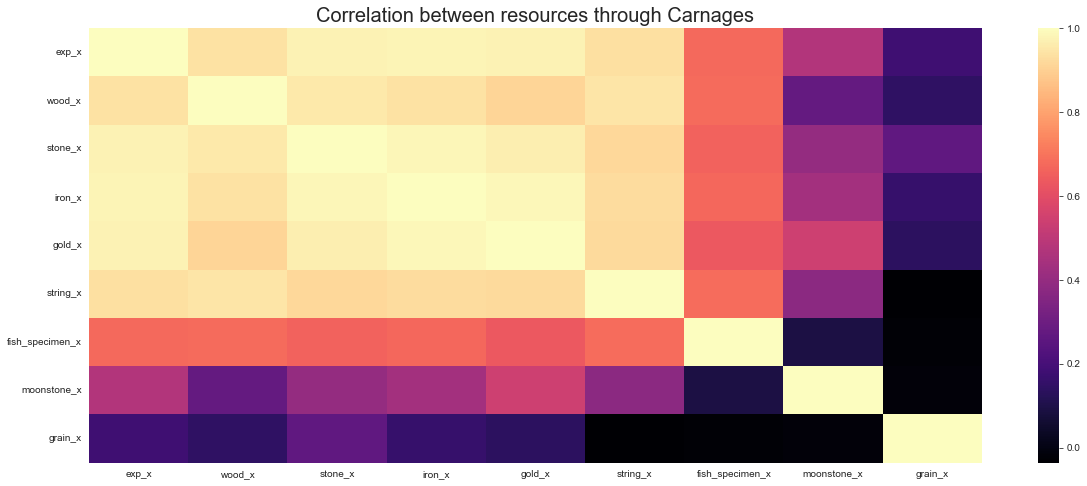

In [18]:
# Pearson Correlation between resources through Carnages using the Final View

# Selecting resources from Final View
rss_fv = ['exp_x','wood_x','stone_x','iron_x','gold_x','string_x','fish_specimen_x','moonstone_x','grain_x']

# Plotting the Heatmap
fig = plt.figure(figsize=(20, 8))

sns.heatmap(fvpv.loc[:,rss_fv].corr(), cmap=style)
plt.title('Correlation between resources through Carnages', size=20)

plt.show()

We can see that high and positive correlations make sense for exp, wood, stone, iron, gold, and string when speaking in a collective term. On the other hand, resources such as grain, fish, and moonstone don't have a strong correlation, which could be partially explained because there are some items that were introduced with a specific goal. For example, fish can be obtained by importing aBait into the game, and aBait can be crafted outside the game with aGrain (grain), so the amount of fish depends on how much aGrain or aBait you can acquire in the marketplace.

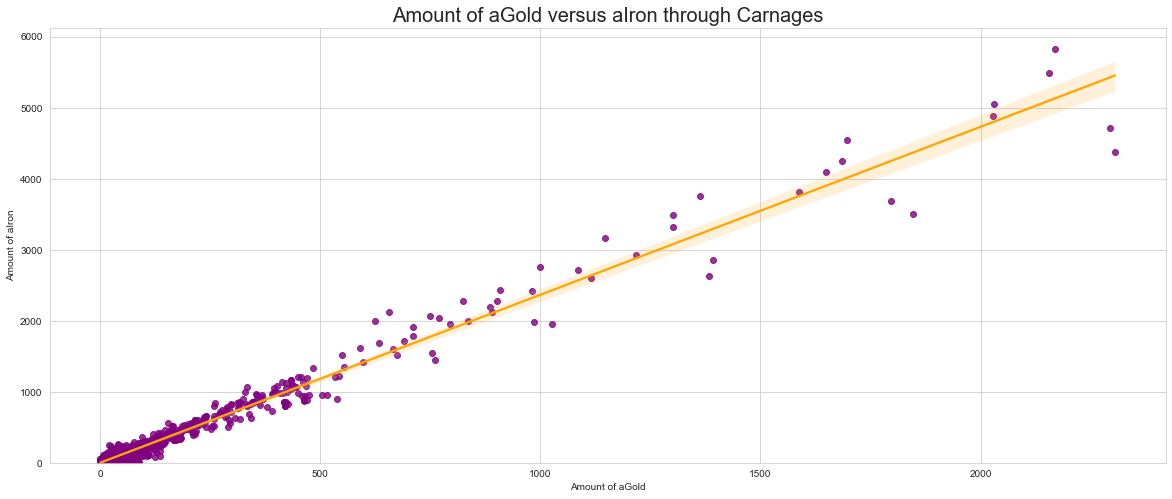

In [19]:
fig = plt.figure(figsize=(20, 8))

sns.regplot(data=fvpv, x="gold_x", y="iron_x", scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
plt.title('Amount of aGold versus aIron through Carnages', size=20)
plt.xlabel('Amount of aGold')
plt.ylabel('Amount of aIron')
plt.ylim(0,)

plt.show()

In [20]:
fvpv[['iron_x','gold_x']].corr()

,iron_x,gold_x
iron_x,1.000000,0.987524
gold_x,0.987524,1.000000


We have a strong postive correlation for aGold and aIron from a collective perspective.

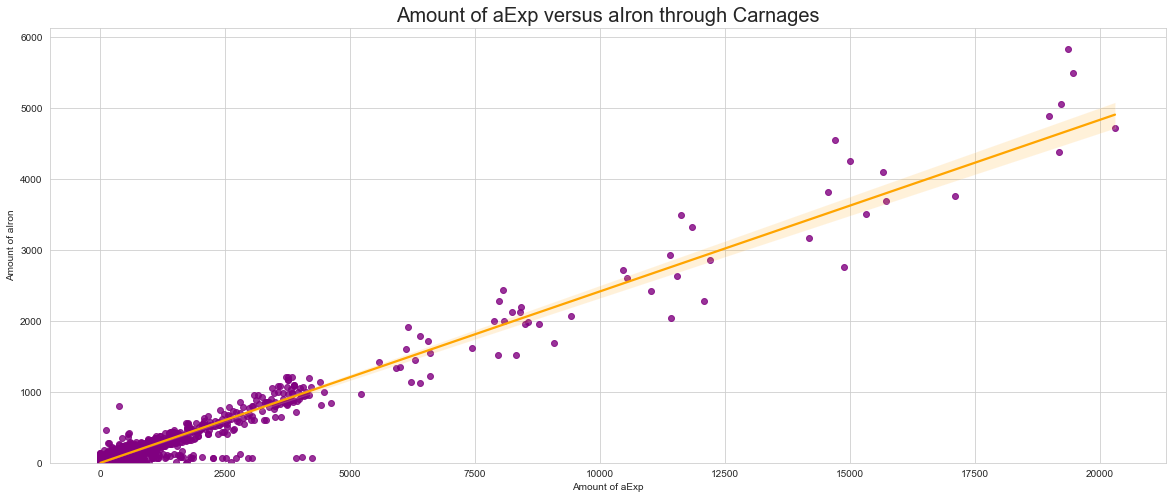

In [21]:
fig = plt.figure(figsize=(20, 8))

sns.regplot(data=fvpv, x="exp_x", y="iron_x", scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
plt.title('Amount of aExp versus aIron through Carnages', size=20)
plt.xlabel('Amount of aExp')
plt.ylabel('Amount of aIron')
plt.ylim(0,)

plt.show()

In [22]:
fvpv[['exp_x','iron_x']].corr()

,exp_x,iron_x
exp_x,1.000000,0.977243
iron_x,0.977243,1.000000


We have a strong postive correlation for aExp and aIron from a collective perspective.

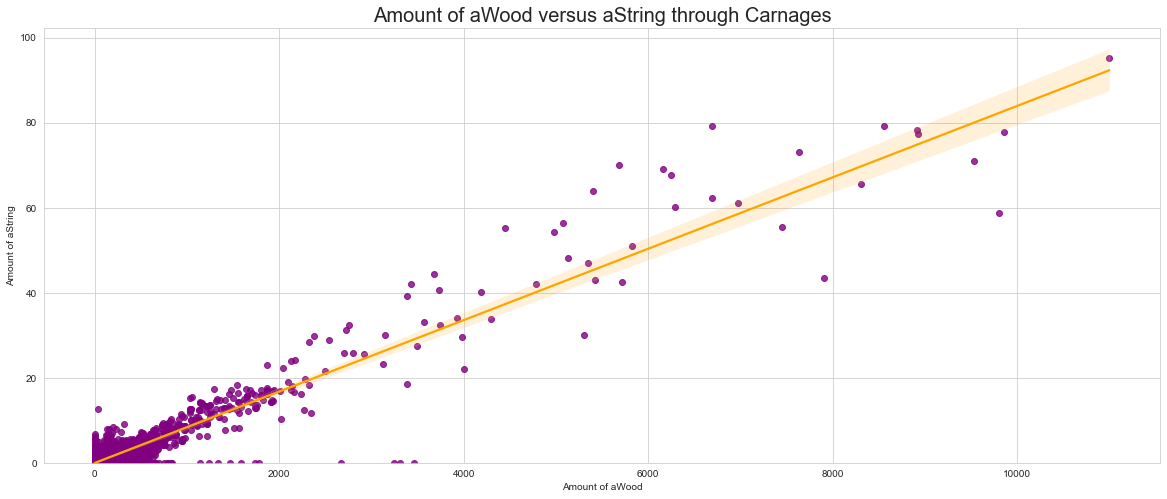

In [23]:
fig = plt.figure(figsize=(20, 8))

sns.regplot(data=fvpv, x="wood_x", y="string_x", scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
plt.title('Amount of aWood versus aString through Carnages', size=20)
plt.xlabel('Amount of aWood')
plt.ylabel('Amount of aString')
plt.ylim(0,)

plt.show()

In [24]:
fvpv[['wood_x','string_x']].corr()

,wood_x,string_x
wood_x,1.000000,0.944566
string_x,0.944566,1.000000


We have a strong postive correlation for aWood and aString from a collective perspective.

Based on the above graph, we see that there is a positive and strong correlation for aExp, aWood, aStone, aIron, aGold, and aString. We have a regplot to see the strong, positive relationship between those variables from a visual perspective. 

Let's continue using the personal view, which just contains the collected items (excluding the Gganbu).

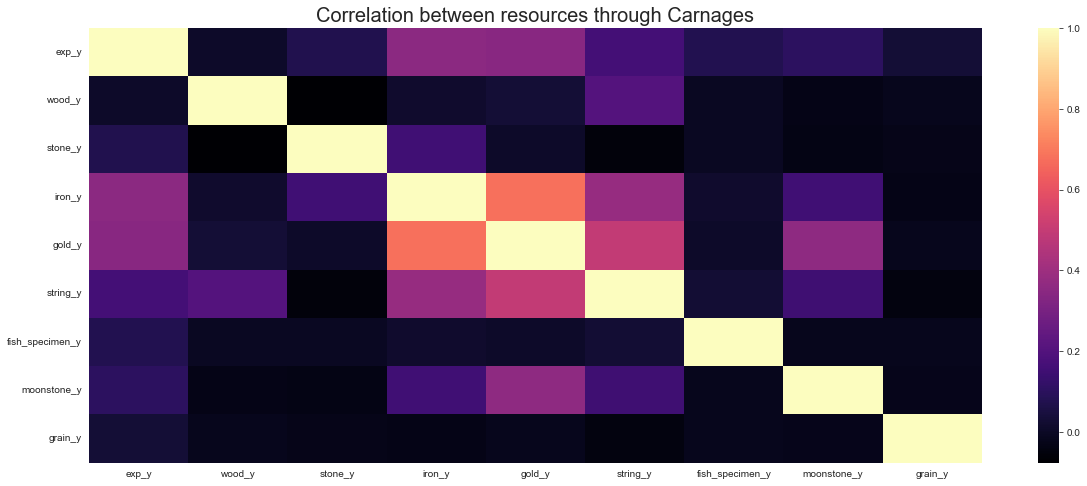

In [25]:
# Pearson Correlation between resources from Personal View

# Selecting resources from Personal View
rss_pv = ['exp_y','wood_y','stone_y','iron_y','gold_y','string_y','fish_specimen_y','moonstone_y','grain_y']

fig = plt.figure(figsize=(20, 8))

sns.heatmap(fvpv.loc[:,rss_pv].corr(), cmap=style)
plt.title('Correlation between resources through Carnages', size=20)

plt.show()

Here, it's a completely different scenario in terms of correlation between the variables. We have lower correlation coefficients, so I'm going to highlight just one, which is the correlation between iron and gold. Let's plot a regression between those two variables.

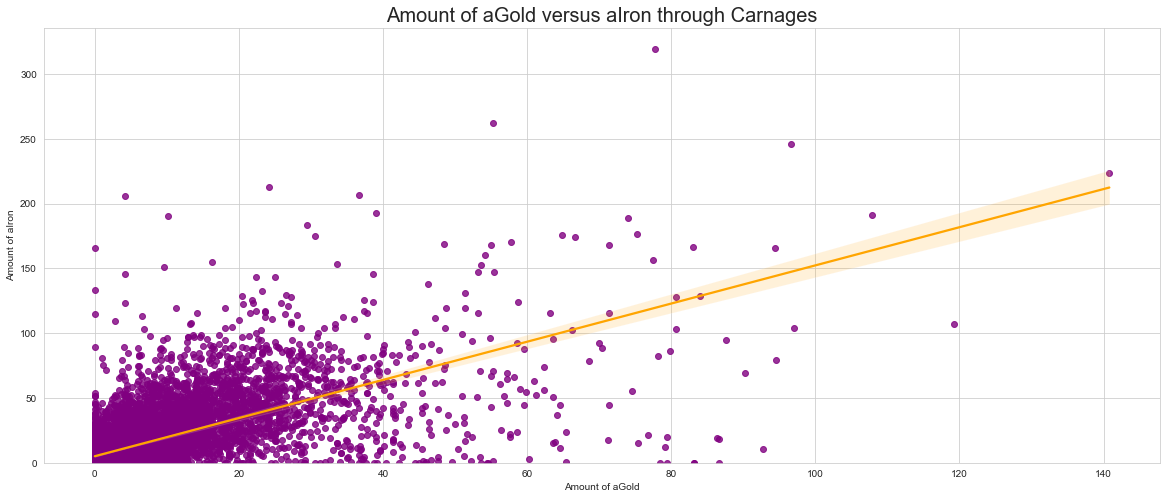

In [26]:
fig = plt.figure(figsize=(20, 8))

sns.regplot(data=fvpv, x="gold_y", y="iron_y", scatter_kws={"color": "purple"}, line_kws={"color": "orange"})
plt.title('Amount of aGold versus aIron through Carnages', size=20)
plt.xlabel('Amount of aGold')
plt.ylabel('Amount of aIron')
plt.ylim(0,)

plt.show()

In [27]:
fvpv[['gold_y','iron_y']].corr()

,gold_y,iron_y
gold_y,1.000000,0.679772
iron_y,0.679772,1.000000


We have a moderately positive correlation for aGold and aIron from an individual perspective. This is the only one that is highlighted from the rest.

In [28]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(fvpv['gold_y'], fvpv['iron_y'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6797720617238592  with a P-value of P = 0.0


### How many players so far?

In [29]:
fvpv[['username']].nunique()

username    1824
dtype: int64

### How many players have participated so far?

We can notice that the number of players increased from the 17th week (04/17/2022) to the last Carnage. Also, we can notice a slight decrease from the last mentioned day in the next two Carnages, but then a recovery. The last Carnage with rewards was on 07/17/2022, so the next and last Sunday we had less participation, and we can say broadly that the number of players was equivalent to 50% of players we could see on average within the 7 last Carnages, where the levels were between 900-1000 players.

If you want to know more about the events please check this link: https://mcapi.moonsama.com/game. 

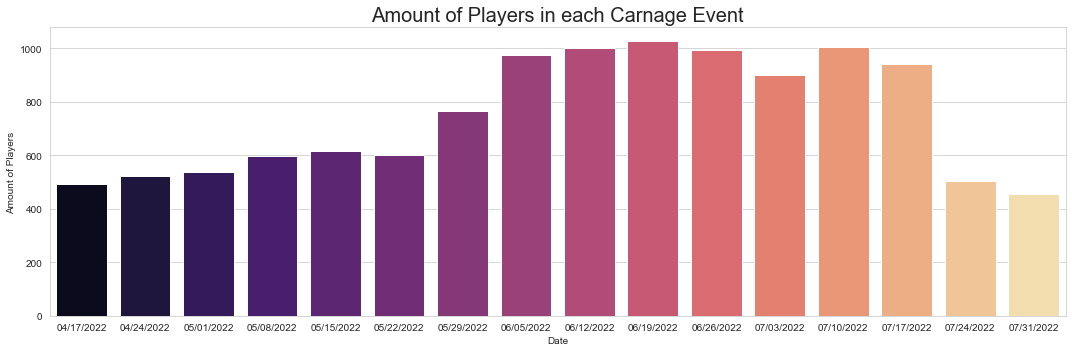

In [30]:
fig = plt.figure(figsize=(15, 5))

sns.countplot(x='date_x', data=fvpv, palette=style)
plt.title('Amount of Players in each Carnage Event', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of Players')

fig.tight_layout()

plt.show()

### How many of them were new in each Carnage?

The idea is to know how many new and old players we have each Carnage within the window of time that we are analyzing.
Generating the label is_old to understand if a player participated before that week.
Each record in the dataset signifies a player in a specific week. If he/she played previously to that week, it will be 1. If they did not play previously to that week, it will be 0.

In [31]:
def played_previously(df):
    df['is_old'] = 0 
    df_copy = df.to_dict('records')
    for r in df_copy:
        player = r['username']
        week = r['week_n']
        for r2 in df_copy:
            if (player == r2['username']) & (week > r2['week_n']):
                r['is_old'] = 1
    new_df = pd.DataFrame.from_dict(df_copy)
    return new_df

new_fvpv = played_previously(fvpv).copy()

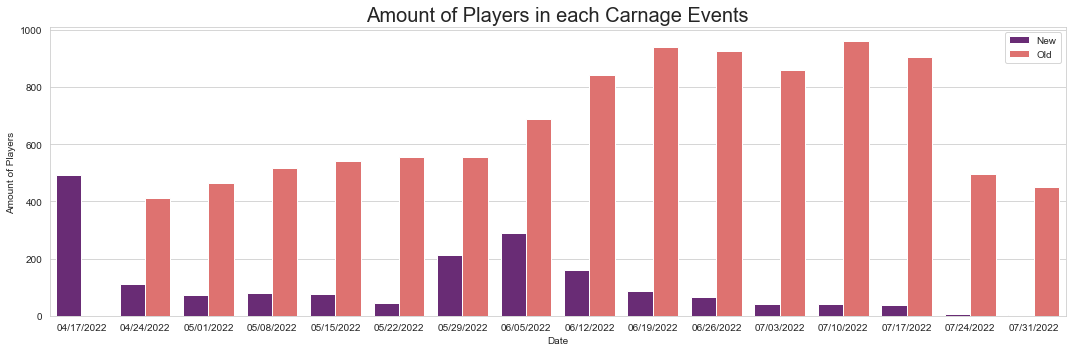

In [32]:
fig = plt.figure(figsize=(15, 5))

sns.countplot(x="date_x", data=new_fvpv, palette=style, hue='is_old')
plt.title('Amount of Players in each Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of Players')
plt.legend(['New','Old'])

fig.tight_layout()

plt.show()

#### Who arrived very late?

There are a few players that probably came quite late into the Carnage events. We say "probably", because we don't have data from Carnage events before 04/17/2022 (we have data ranging from week 17 to week 33 of Carnage events).

In [33]:
new_fvpv[(new_fvpv['date_x']=='07/24/2022') & (new_fvpv['is_old']==0)]['username']

11094           biggwb
11126    Blinkin_chaos
11256           Medske
11303         c4b0rj4z
11380         PolkaBee
11430        nexus9290
Name: username, dtype: object

### How many sessions have the players played?

In order to know if players have been played recurrently, we need to calculate how many sessions they have participated in. We have 1,824** players that have been played so far, and if we calculate how many session they have participated in, we can see that we have a significant amount of new players who have played 7 Carnages, equalling 1.221 players (67%, or approximately ⅔, of the total players) while ⅓ of the players have played more than 7 Carnages. We can conclude that a third of the total are older players, and probably where we can discover more Moonsamas.

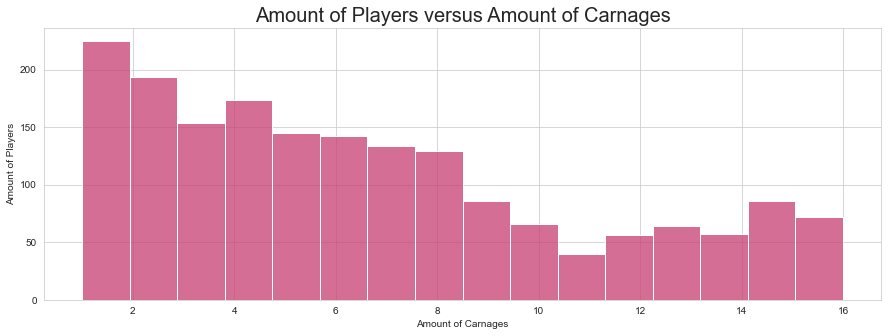

In [34]:
byPlayer = fvpv.groupby('username').count()
byPlayer = byPlayer.reset_index()
byPlayer.head()

fig = plt.figure(figsize=(15, 5))

plt.title('Amount of Players versus Amount of Carnages', size=20)
plt.xlabel('Amount of Carnages')
plt.ylabel('Amount of Players')

sns.histplot(data=byPlayer, x="date_x", color='#c83d72')

plt.show()

4% of players have played all the carnages without missing an event. Just a small percentage of players were attending each event. 30% of players missed 1-7 events overall.

### How about mining?

#### Checking the Personal View. (Resources ending in "_y")

In [35]:
rssByCarnage = fvpv.groupby(['date_x']).sum()[rss_pv]
rssByCarnage

,exp_y,wood_y,stone_y,iron_y,gold_y,string_y,fish_specimen_y,moonstone_y,grain_y
date_x,,,,,,,,,
04/17/2022,188243.0,9372.8,51157.4,6333.2,2032.6,0.0,0.0,0.0,3434.4
04/24/2022,25953.8,10698.0,52355.2,6613.6,2059.8,0.0,0.0,0.0,6696.0
05/01/2022,23791.2,9638.6,54319.2,4404.8,1957.0,0.0,0.0,0.0,6351.2
05/08/2022,29863.4,29320.2,56243.0,7397.6,3097.2,161.0,0.0,0.0,0.0
05/15/2022,33081.2,20442.2,59996.0,7392.8,2997.8,242.4,0.0,0.0,0.0
05/22/2022,34656.2,19473.8,50863.0,6447.4,2431.4,216.8,10634.0,0.0,0.0
05/29/2022,45082.8,24291.6,62729.0,8789.2,3181.4,232.8,15077.0,0.0,0.0
06/05/2022,52962.4,31329.6,82310.4,11944.0,4322.0,247.2,19007.0,0.0,0.0
06/12/2022,57970.8,33154.0,93268.4,15220.4,6122.6,287.0,17795.0,0.0,0.0


We see that stone, exp, wood, iron, gold, and fish are the most common resources to collect. On the other hand, we have some less common resources: grain, string, and moonstone. So, if we calculate the total number of mined resources (before Gganbu):

In [36]:
rssByCarnage.sum()

exp_y               784113.2
wood_y              306445.4
stone_y            1005750.4
iron_y              151612.0
gold_y               61692.0
string_y              2507.2
fish_specimen_y      99961.0
moonstone_y           4616.6
grain_y              16481.6
dtype: float64

#### Plotting the proportion of mined resources (from a personal view, just 20%)

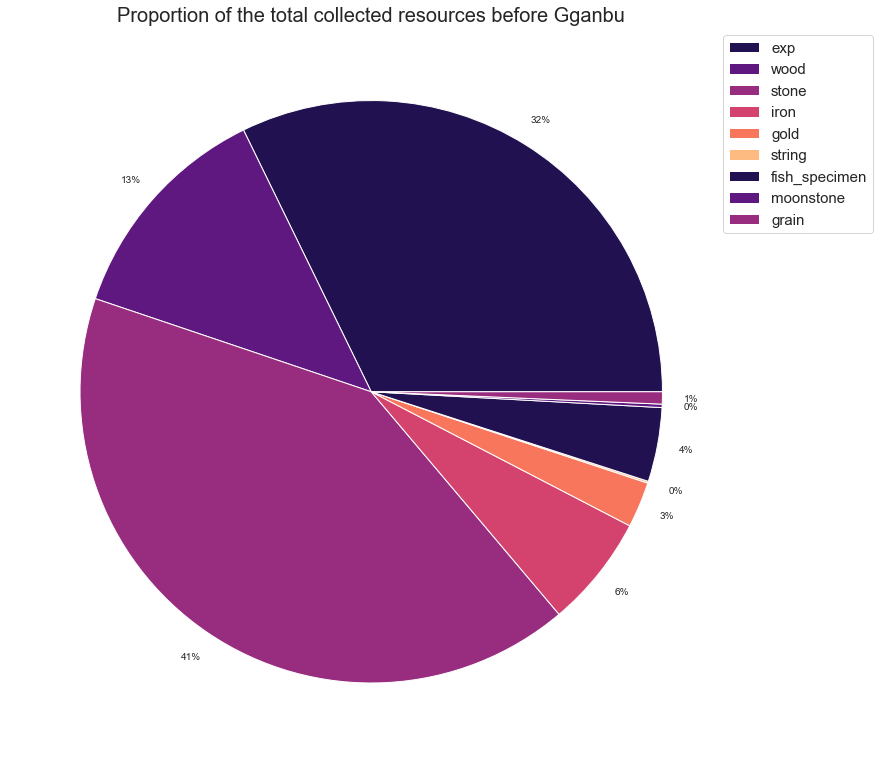

In [37]:
rss = rssByCarnage.sum()

fig = plt.figure(figsize=(12, 12))

plt.pie(rss, colors=palette_color, autopct='%.0f%%', pctdistance=1.1)
plt.legend(rss.index.str.replace('_y',''), loc='upper right', bbox_to_anchor=(1.2,1), fontsize=15)
plt.title('Proportion of the total collected resources before Gganbu', size=20)

plt.tight_layout()
plt.show()

#### Let's take a look to the top 6 mined resources in our window of time

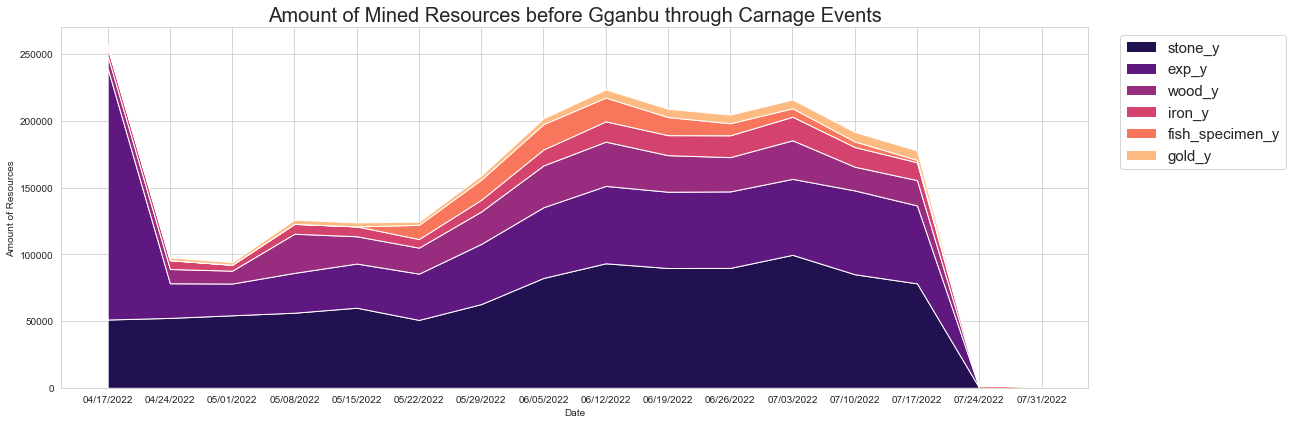

In [38]:
rbc = rssByCarnage

fig = plt.figure(figsize=(18, 6))
plt.stackplot(rbc.index, rbc['stone_y'], rbc['exp_y'], rbc['wood_y'], rbc['iron_y'], rbc['fish_specimen_y'], rbc['gold_y'], colors=palette_color)
plt.title('Amount of Mined Resources before Gganbu through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of Resources')
plt.legend(['stone_y','exp_y','wood_y','iron_y','fish_specimen_y','gold_y'], loc='upper right', bbox_to_anchor=(1.2,1), fontsize=15)
plt.tight_layout()
plt.show()

#### Let's take a look to the less mined resources in our window of time

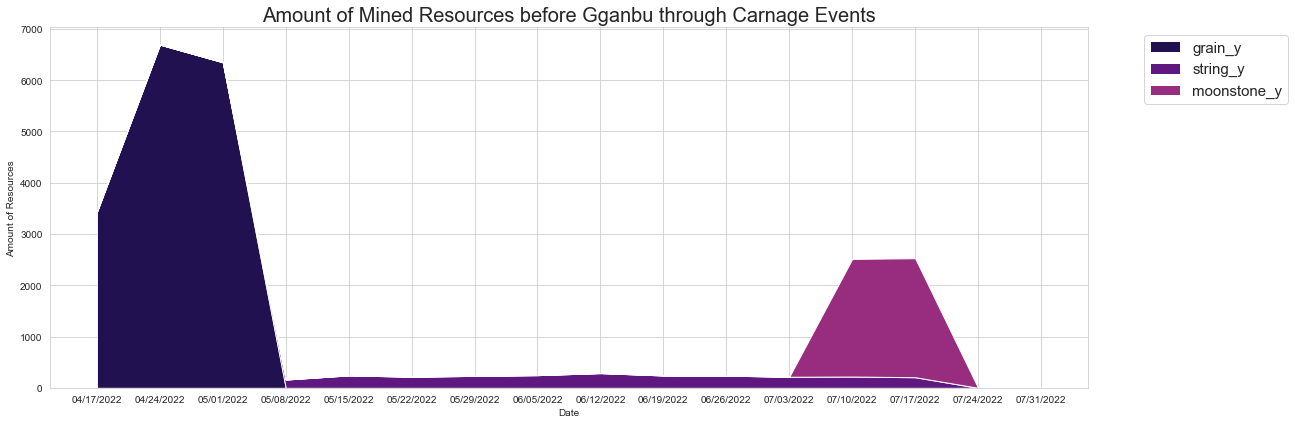

In [39]:
rbc = rssByCarnage

fig = plt.figure(figsize=(18, 6))
plt.stackplot(rbc.index, rbc['grain_y'], rbc['string_y'], rbc['moonstone_y'], colors=palette_color)
plt.title('Amount of Mined Resources before Gganbu through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of Resources')
plt.legend(['grain_y','string_y','moonstone_y'], loc='upper right', bbox_to_anchor=(1.2,1), fontsize=15)
plt.tight_layout()
plt.show()

We can notice that one of the most common resources is stone. It's also one of the primary resources to craft useful tools within the first minutes of the game. Also, we can assume that players without expertise try to fill the inventory with stone because one common gaming technique is to stay safe in a cave/hole within the last minutes of carnage to preserve inventory.

There's a considerable amount of exp generated just for playing. We can't see how is that distributed in this graph, but we can think that most of the exp generated will be distributed between players.

Wood, the third most common resource, is a super important resource at the beginning, and we can assume that it is way less mined than stone because players are more inclined to mine in order to get more valuable resources (gold, iron). Furthermore, we can assume that just finding wood on the surface could imply a risk, like getting killed by another player or mobs.

The less common resources are listed below:

- Iron
- Fish
- Gold
- Grain
- String
- Moonstone


#### Checking the Final View. (Resources ending in "_x")

We are not going to check the proportion of the resources because we know that is going to be the same due to the personal view being 20% of the final view. The only difference is how the other 80% is distributed among the players.

In [40]:
fvpv.iloc[:, 0:12].groupby('date_x')[rss_fv].sum()

,exp_x,wood_x,stone_x,iron_x,gold_x,string_x,fish_specimen_x,moonstone_x,grain_x
date_x,,,,,,,,,
04/17/2022,188243.000000,46864.000000,255787.000000,31666.000000,10163.000000,0.000000,0.0,0.0,17172.0
04/24/2022,129769.000000,53490.000000,261776.000000,33068.000000,10299.000000,0.000000,0.0,0.0,33480.0
05/01/2022,118956.000000,48193.000000,271596.000000,22024.000000,9785.000000,0.000000,0.0,0.0,31756.0
05/08/2022,149317.000000,146601.000000,281215.000000,36988.000000,15486.000000,805.000000,0.0,0.0,0.0
05/15/2022,165822.115723,102468.134591,300734.666667,37056.991195,15026.708176,1215.049057,0.0,0.0,0.0
05/22/2022,173281.000000,97369.000000,254315.000000,32237.000000,12157.000000,1084.000000,10634.0,0.0,0.0
05/29/2022,225414.000000,121458.000000,313645.000000,43946.000000,15907.000000,1164.000000,15077.0,0.0,0.0
06/05/2022,264812.000000,156648.000000,411552.000000,59720.000000,21610.000000,1236.000000,19007.0,0.0,0.0
06/12/2022,289854.000000,165770.000000,466342.000000,76102.000000,30613.000000,1435.000000,17795.0,0.0,0.0


Tiny note: Total aExp in the final view is 188,243, which is the same in the personal view. That means that in this case, aExp wasn't taxed that session with the 80%. This occurred on the date of 04/17/2022.

### How about the Gganbu in each Carnage

Gganbu was increasing during each Carnage with a few exceptions. We can notice that we had a distribution of fish_specimen on 06/12/2022, which could mean that just in that specific Carnage, players collected more fish than was allowed, and those extra fish were distributed (this is just an assumption).

In [41]:
gganbu = fvpv.groupby('date_x').sum().reset_index()[['date_x','gganbu_wood','gganbu_stone', 'gganbu_iron', 'gganbu_exp', 'gganbu_grain','gganbu_gold', 'gganbu_string', 'gganbu_fish', 'gganbu_moonstone']]
gganbu

,date_x,gganbu_wood,gganbu_stone,gganbu_iron,gganbu_exp,gganbu_grain,gganbu_gold,gganbu_string,gganbu_fish,gganbu_moonstone
0,04/17/2022,37491.20109,204629.59984,25332.79889,0.00000,13737.59937,8130.39889,0.00000,0.0,0.00000
1,04/24/2022,42792.00050,209420.79957,26454.40061,103815.20021,26784.00017,8239.19936,0.00000,0.0,0.00000
2,05/01/2022,38554.39946,217276.79926,17619.20023,95164.79946,25404.79941,7827.99959,0.00000,0.0,0.00000
3,05/08/2022,117280.80100,224971.99907,29590.40032,119453.60085,0.00000,12388.79911,644.00062,0.0,0.00000
4,05/15/2022,82025.93552,240738.66605,29664.19149,132740.91521,0.00000,12028.90870,972.64947,0.0,0.00000
5,05/22/2022,77895.19953,203452.00026,25789.60073,138624.79981,0.00000,9725.60018,867.20065,0.0,0.00000
6,05/29/2022,97166.39958,250915.99915,35156.79929,180331.19933,0.00000,12725.59941,931.19970,0.0,0.00000
7,06/05/2022,125318.40034,329241.60025,47775.99954,211849.59953,0.00000,17287.99920,988.79909,0.0,0.00000
8,06/12/2022,132616.00057,373073.60018,60881.60022,231883.20035,0.00000,24490.39916,1148.00033,0.0,0.00000
9,06/19/2022,109543.19949,358962.40012,59939.20069,228590.40026,0.00000,24933.59947,962.40041,0.0,0.00000


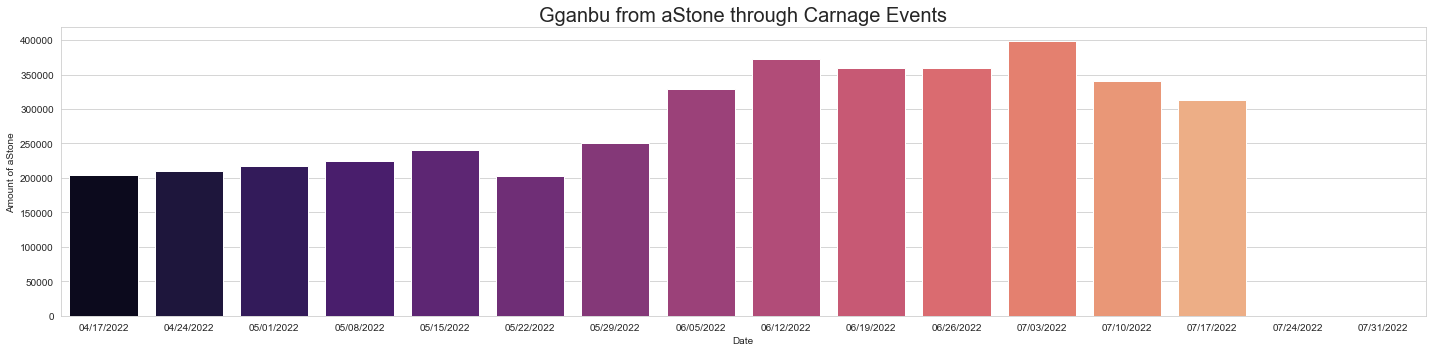

In [42]:
fig = plt.figure(figsize=(20, 5))

sns.barplot(data=gganbu, x='date_x', y='gganbu_stone', palette=style)
plt.title('Gganbu from aStone through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of aStone')

fig.tight_layout()

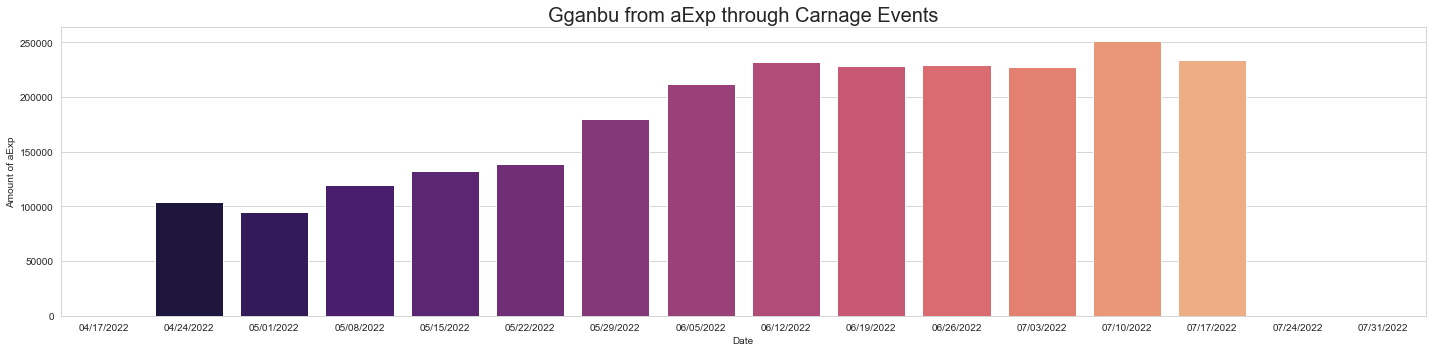

In [43]:
fig = plt.figure(figsize=(20, 5))

sns.barplot(data=gganbu, x='date_x', y='gganbu_exp', palette=style)
plt.title('Gganbu from aExp through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of aExp')

fig.tight_layout()

We have Gganbu equal to zero on 04/17/2022 as we mentioned before because both personal and final view have the same amount of aExp.

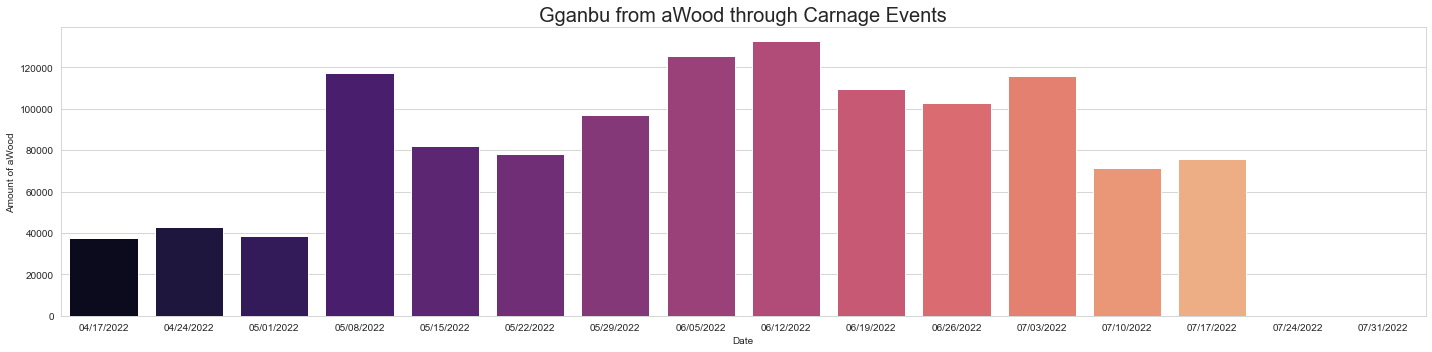

In [44]:
fig = plt.figure(figsize=(20, 5))

sns.barplot(data=gganbu, x='date_x', y='gganbu_wood', palette=style)
plt.title('Gganbu from aWood through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of aWood')

fig.tight_layout()

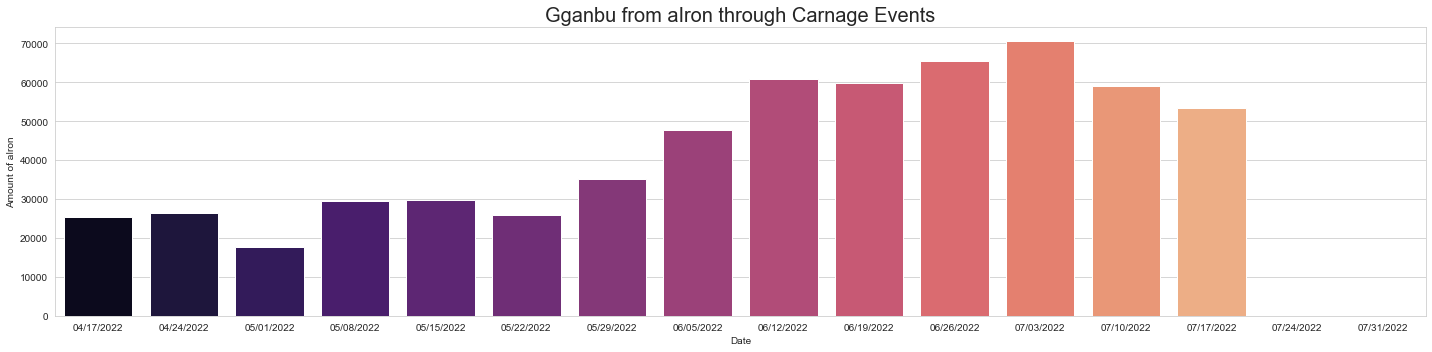

In [45]:
fig = plt.figure(figsize=(20, 5))

sns.barplot(data=gganbu, x='date_x', y='gganbu_iron', palette=style)
plt.title('Gganbu from aIron through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of aIron')

fig.tight_layout()

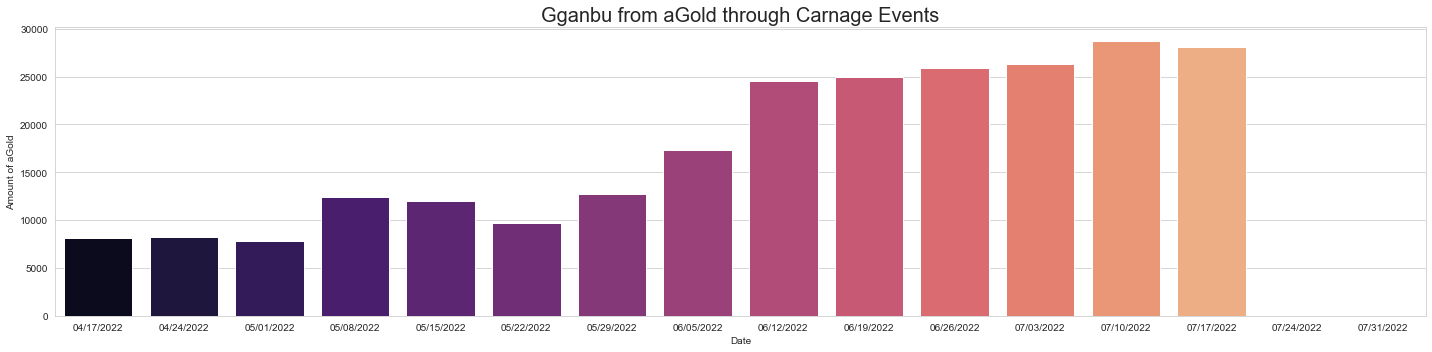

In [46]:
fig = plt.figure(figsize=(20, 5))

sns.barplot(data=gganbu, x='date_x', y='gganbu_gold', palette=style)
plt.title('Gganbu from aGold through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of aGold')

fig.tight_layout()

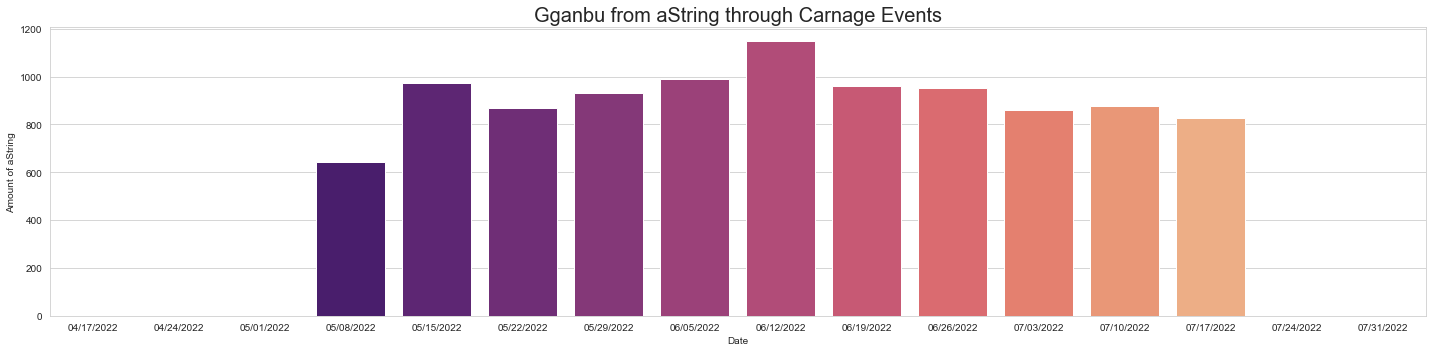

In [47]:
fig = plt.figure(figsize=(20, 5))

sns.barplot(data=gganbu, x='date_x', y='gganbu_string', palette=style)
plt.title('Gganbu from aString through Carnage Events', size=20)
plt.xlabel('Date')
plt.ylabel('Amount of aString')

fig.tight_layout()

Here we found that string has zero for the three first Sundays, which is because it wasn't implemented before 05/08/2022.

### Comments of the graphs above

The total collected Gganbu in each Carnage increased, generally speaking. We have some exceptions, like with aWood, where we had a high increase on 05/08/2022. We can suppose that the number of players at that time was directly proportional to the amount of Gganbu generated and to the amount of mined resources as well. Let's check that using the final view for a total number of resources.

In [48]:
# We need to get a series or dataframe with date and the values we are checking, in this case, total gganbu and total number of players.
# We are going to exclude the last two carnages because wasn't with rewards.

# Number of Players in the time
nPlayers = fvpv.groupby('date_x').count().reset_index()[['date_x', 'username']]
nPlayers = nPlayers[(nPlayers['date_x'] != '07/24/2022') & (nPlayers['date_x'] != '07/31/2022')]

# Total Gganbu in the time
fvpv['total_gganbu'] = fvpv.iloc[:, 23:31].sum(axis=1)
gganbu = fvpv.groupby('date_x').sum().reset_index()[['date_x', 'total_gganbu']]
gganbu = gganbu[(gganbu['date_x'] != '07/24/2022') & (gganbu['date_x'] != '07/31/2022')]

# Total resources unit in the time
fvpv['total_rrss'] = fvpv.iloc[:, [1,2,3,4,5,6,9,10,11]].sum(axis=1)
total_rrss = fvpv.groupby('date_x').sum().reset_index()[['date_x', 'total_rrss']]
total_rrss = total_rrss[(total_rrss['date_x'] != '07/24/2022') & (total_rrss['date_x'] != '07/31/2022')]

In [49]:
from sklearn import preprocessing

x_array = np.array(gganbu['total_gganbu'])
normalized_arr1 = preprocessing.normalize([x_array])

x_array = np.array(nPlayers['username'])
normalized_arr2 = preprocessing.normalize([x_array])

x_array = np.array(total_rrss['total_rrss'])
normalized_arr3 = preprocessing.normalize([x_array])

print(normalized_arr1)
print(normalized_arr2)
print(normalized_arr3)

[[0.12148885 0.17531452 0.16873975 0.21177273 0.20918679 0.1916275
  0.24238312 0.30756784 0.3460443  0.32876016 0.32898456 0.35249344
  0.31537513 0.29594407]]
[[0.16292675 0.17249127 0.17710863 0.19722712 0.20349353 0.19788674
  0.25296521 0.32189576 0.33014104 0.33871613 0.32750255 0.29683011
  0.33113048 0.31068218]]
[[0.18080152 0.17159105 0.16515592 0.20727493 0.20461555 0.19105394
  0.2421924  0.30728483 0.3445456  0.32623776 0.32496796 0.34708586
  0.3138186  0.29407492]]


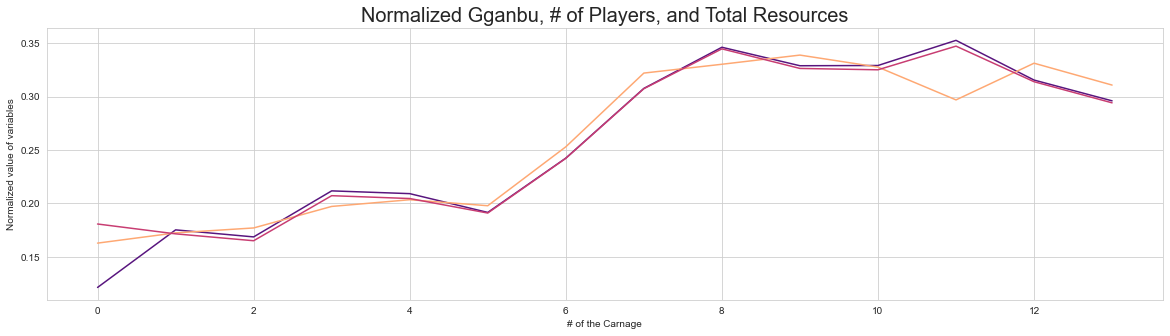

In [50]:
fig = plt.figure(figsize=(20, 5))

x = normalized_arr1.reshape(1,-1)[0] #gganbu
y = normalized_arr2.reshape(1,-1)[0] #number players
w = normalized_arr3.reshape(1,-1)[0] #resources

plt.plot(x, color='#58157e')
plt.plot(y, color='#fea873')
plt.plot(w, color='#c83d72')
plt.title('Normalized Gganbu, # of Players, and Total Resources', size=20)
plt.xlabel('# of the Carnage')
plt.ylabel('Normalized value of variables')

plt.show()

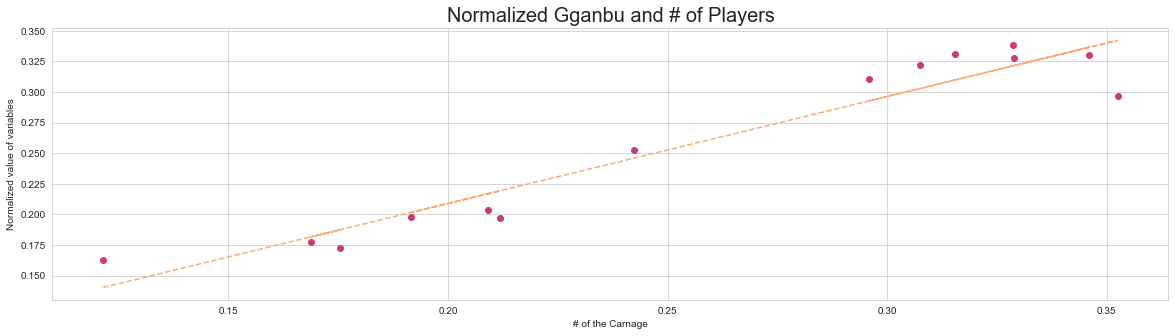

In [51]:
fig = plt.figure(figsize=(20, 5))

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), color='#fea873', linestyle='dashed')
plt.scatter(x,y, color='#c83d72')
plt.title('Normalized Gganbu and # of Players', size=20)
plt.xlabel('# of the Carnage')
plt.ylabel('Normalized value of variables')

plt.show()

In [52]:
# Correlation between normalized gganbu and number of players
np.corrcoef(x, y)[0, 1]

0.9593959023882939

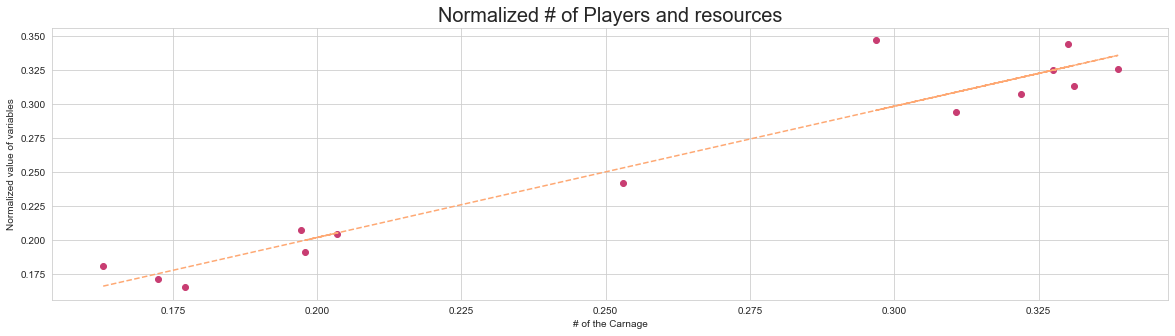

In [53]:
fig = plt.figure(figsize=(20, 5))

z = np.polyfit(y, w, 1)
p = np.poly1d(z)

plt.plot(y, p(y), color='#fea873', linestyle='dashed')
plt.scatter(y,w, color='#c83d72')
plt.title('Normalized # of Players and resources', size=20)
plt.xlabel('# of the Carnage')
plt.ylabel('Normalized value of variables')

plt.show()

In [54]:
# Correlation between normalized total resources and number of players
np.corrcoef(y, w)[0, 1]

0.9652751457494816

We can conclude that we were right about the high positive correlation between the number of players, collected Gganbu, and total mined units.

### b. Going deeper into the Player's Analysis

 - Average Percentage Change of the Mined Value per Player. How well did we do?
 - Moonsamas/VIP tickets or passes. Can we detected them?
 - Can we clasify players into groups? (noob/safe mining/butcher)

#### How well did we do?

The main idea of this part is to analyze how well (on average) the players did during the Carnage events that we are analyzing. In order to get a good picture of the player’s performance, I decided on the following approach:

    - Calculate an approximate value for each resource collected by the player to get a total value per player.
    - Calculate a percentage change through the Carnage events.
    - Calculate the average of the percentages change.

    
One thing to keep in mind is that we can exclude fish because it has different rules to be able to obtain them: just the players who had money to buy aBait or aGrain could get aFish by fishing in Carnage events, and the value of aFish was extremely high, so the weight for the total value could be affecting the percentages change. So, I decided to do the analysis without aFish.
Another resource we are going to exclude is the grain because it was implemented with the particular purpose of creating scarcity in crafting.
In other words, we are going to work with resources that were not externally affected through the game.

    - Exp 
    - Wood
    - Stone
    - Iron
    - Gold
    - String
    - Moonstone


### Integrating the prices for each resource, player, and carnage

In [55]:
#resources = ['exp','wood','stone','iron','gold','grain','string','fish_specimen','moonstone']
columns = ['username','date','exp','wood','stone','iron','gold','grain','string','fish_specimen','moonstone']

In [56]:
# The prices are just an approximation that could be adjust it 
# (average price in the last 2 months using moonsama.io to simplify and give a weight)

data = {'resource': ['exp','wood','stone','iron','gold','grain','string','fish_specimen','moonstone'],
        'avg_price_2m': [0.003,0.0075,0.003,0.0175,0.06,1.50,0.75,1.85,0.315]}

avgPriceRss = pd.DataFrame(data)
avgPriceRss

,resource,avg_price_2m
0,exp,0.0030
1,wood,0.0075
2,stone,0.0030
3,iron,0.0175
4,gold,0.0600
5,grain,1.5000
6,string,0.7500
7,fish_specimen,1.8500
8,moonstone,0.3150


In [57]:
# Calculating total value collected by players for each carnage

# A) Calculating the total value
df_copy = df.copy()
df_copy.rename(columns={'index':'username'}, inplace=True)

rss_list = avgPriceRss['resource'].to_list()
for rss in rss_list:
    df_copy[rss] = df_copy[rss].apply(lambda x: x*avgPriceRss.iloc[rss_list.index(rss)]['avg_price_2m'])
    
df_copy['total_value'] = df_copy[rss_list].sum(axis=1)

# B) Calculating the total value without fish and grain
# excluding fish
if 'fish_specimen' in rss_list:
    rss_list.remove('fish_specimen')
    
# excluding grain
if 'grain' in rss_list:
    rss_list.remove('grain')

df_copy['total_value_nfng'] = df_copy[rss_list].sum(axis=1)

df_copy.head()

,username,exp,stone,iron,gold,wood,grain,date,week_n,string,fish_specimen,moonstone,total_value,total_value_nfng
0,satchitanandaa,1.578,0.0546,0.7490,0.396,0.0135,0.0,2022-04-17,17,0.0,0.0,0.0,2.7911,2.7911
1,eunn296,0.801,0.0546,0.8470,1.776,0.0000,14.7,2022-04-17,17,0.0,0.0,0.0,18.1786,3.4786
2,Bowser_Staxx,0.354,1.0560,0.0980,0.000,0.0135,0.0,2022-04-17,17,0.0,0.0,0.0,1.5215,1.5215
3,K2saman,0.402,0.2130,0.0595,0.000,0.1335,0.0,2022-04-17,17,0.0,0.0,0.0,0.8080,0.8080
4,SubstraKnight,0.144,1.3440,0.0000,0.000,0.1905,0.0,2022-04-17,17,0.0,0.0,0.0,1.6785,1.6785


In [58]:
# Calculating the average of the percentages change of the collected value of each player

# Considerations for the calculation:

# 1. From the dataset week 31 and 32 are excluded. Due to those are weeks without rewards.
# 2. If the total value is zero in a particular event, that value will be excluded due to effects of division by zero.

df_copy = df_copy[df_copy['week_n']<=30] 

pct_change_players = pd.DataFrame(columns=['username','avg_pct_change']) 

players = df_copy['username'].unique().tolist()

for player in players:
    player_series = df_copy[df_copy['username']==player]['total_value_nfng']
    player_series = player_series[~player_series.isin([0])]
    avg_pct_change = player_series.pct_change(axis='rows', periods=1).mean()
    temp_df = pd.DataFrame(data={'username':[player],'avg_pct_change':[avg_pct_change]})
    pct_change_players = pd.concat([pct_change_players,temp_df], ignore_index=True)

pct_change_players['avg_pct_change'] = pct_change_players['avg_pct_change'].astype(float)
pct_change_players.head()

,username,avg_pct_change
0,satchitanandaa,0.635409
1,eunn296,1.456534
2,Bowser_Staxx,2.033260
3,K2saman,1.196681
4,SubstraKnight,1.575802


#### Inspecting the dataset pct_change_players

In [59]:
# As we saw before there are 1,814

pct_change_players.shape

(1814, 2)

In [60]:
# We have 337 players that have no percentage change calculated

pct_change_players.isna().sum()

username            0
avg_pct_change    337
dtype: int64

In [61]:
# We can see that 1,477 players have a percentage change assigned to them. 75% of the players have less than 477% average percentage change. We have really extreme values that could mean:
# 1. Players were extremely good improving themselfs 
# 2. Players were using hacks (we have some discovered and public cases)

pct_change_players.describe()

,avg_pct_change
count,1477.000000
mean,22.503706
std,203.415433
min,-0.999234
25%,0.247175
50%,0.974259
75%,4.767294
max,7240.029412


#### Distribution of the percentage change of all the players

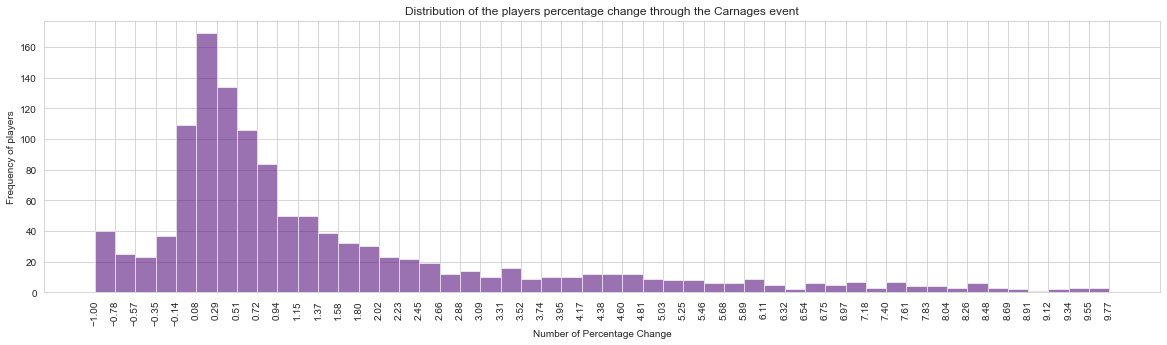

In [62]:
data = pct_change_players[(pct_change_players['avg_pct_change']<10)]

count, bin_edges = np.histogram(data['avg_pct_change'], 50)

data['avg_pct_change'].plot(kind ='hist', 
                              figsize=(20, 5),
                              bins=50,
                              alpha=0.6,
                              xticks=bin_edges,
                              color=['#58157e'],
                              rot=90
                             )

plt.title('Distribution of the players percentage change through the Carnage events')
plt.ylabel('Frequency of players')
plt.xlabel('Number of Percentage Change')

plt.show()

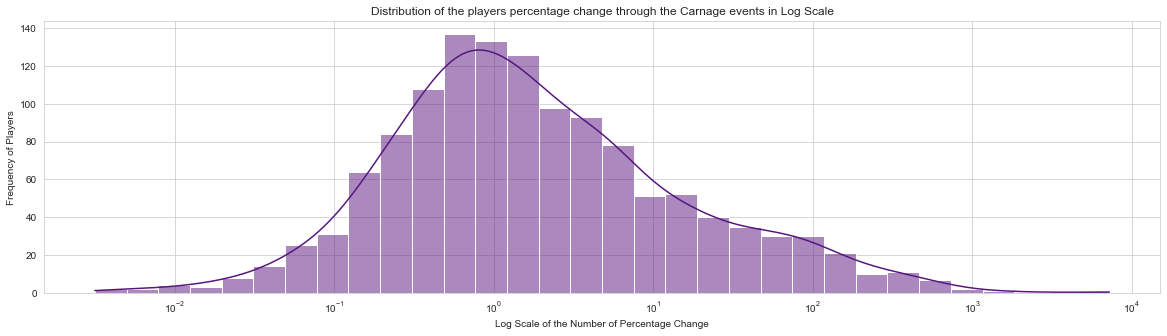

In [78]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(data=pct_change_players[pct_change_players['avg_pct_change']>=0], 
             x='avg_pct_change', 
             kde=True, 
             log_scale=True,
             color='#58157e'
            )

plt.title('Distribution of the players percentage change through the Carnage events in Log Scale')
plt.ylabel('Frequency of Players')
plt.xlabel('Log Scale of the Number of Percentage Change')

plt.show()

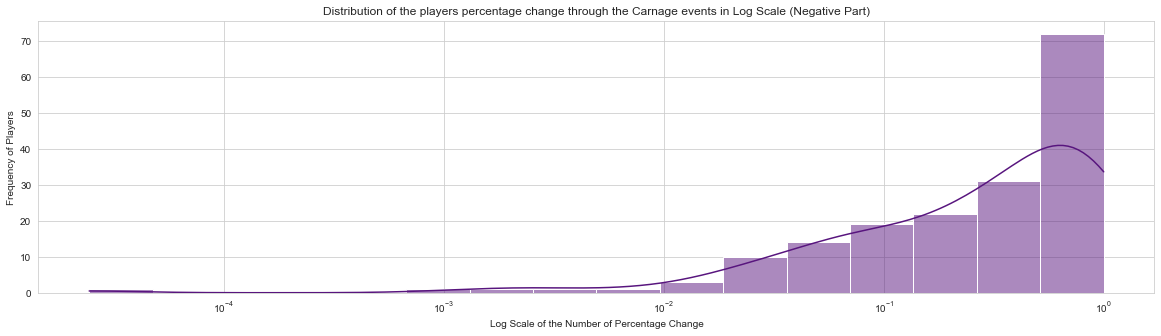

In [79]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(data=-1*pct_change_players[pct_change_players['avg_pct_change']<0],
             x='avg_pct_change', 
             kde=True, 
             log_scale=True,
             color='#58157e'
            )

plt.title('Distribution of the players percentage change through the Carnage events in Log Scale (Negative Part)')
plt.ylabel('Frequency of Players')
plt.xlabel('Log Scale of the Number of Percentage Change')

plt.show()

We obtained a left skewed distribution for the percentage change player, as we explore it we can understand that there are negative pct changes (100 players approximately in a quick look), then there are a significant amount of people between 0-50%, another group of players between 50-100%, 100-300%, and 300% plus. I've limited the first histogram to show values less than 1000% esencially because it's more easy to see the distribution due to existance of extreme values. In the second plot we have a log scale applied to the data and we see a normal distribution where most of the players are between 10^-1 and 10^1. We can also see the distribution of the negative percentages change. What if we classify making ranges with simple rules.

In [65]:
def categorizing_pct(value):
    if value < -0.10:
        return 'bad'
    if (value >= -0.10) and (value < 0.10):
        return 'neutral'
    if (value >= 0.10) and (value < 1):
        return 'good'
    if (value >= 1) and (value < 5):
        return 'very good'
    if (value >= 3) and (value < 10):
        return 'extremely good'
    if value >= 10:
        return 'beyond limits'

In [66]:
players_cat = pct_change_players[~pct_change_players['avg_pct_change'].isna()]
players_cat.shape

(1477, 2)

In [67]:
pct_change_players['cat_pct_change'] = players_cat['avg_pct_change'].apply(lambda x: categorizing_pct(x))
cat_pct_players = pct_change_players.groupby('cat_pct_change').count().reset_index()[['cat_pct_change','username']]
cat_pct_players.sort_values('username', ascending=True, inplace=True)
cat_pct_players

,cat_pct_change,username
2,extremely good,103
4,neutral,119
0,bad,133
1,beyond limits,256
5,very good,374
3,good,492


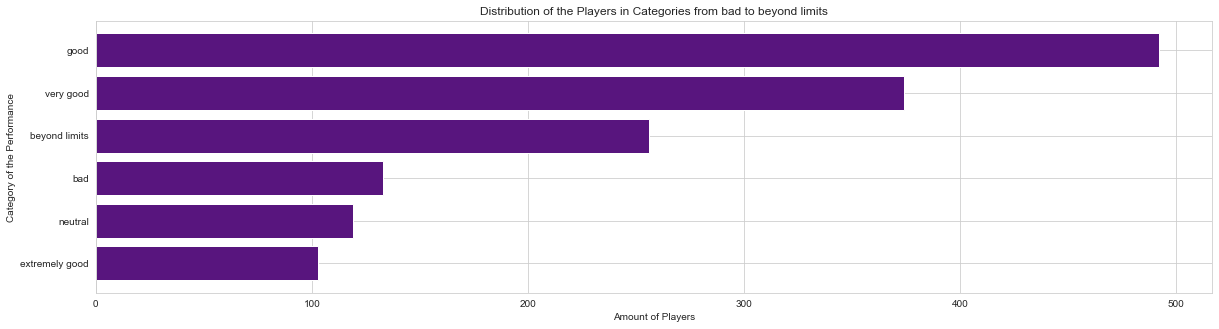

In [80]:
fig = plt.figure(figsize=(20, 5))
plt.barh(y=cat_pct_players.cat_pct_change, width=cat_pct_players.username, color='#58157e')
plt.title('Distribution of the Players in Categories from bad to beyond limits')
plt.ylabel('Category of the Performance')
plt.xlabel('Amount of Players')

plt.show()

We can see that good and very good are the most important groups, but we see that "beyond limit" category is just right next to "very good". These huge percentages that we can find in beyond limits could be affected by division of small numbers.

#### What if a player got killed, and because of that ended the game with almost zero in the inventory? Which could it be a good approach to identify them?

This question emerged because we have calculated the percentage change for each player, but we know that mathematically 
we can obtain a huge percentage change due to division by "almost" zero, this is one reason we are excluding zeros above. Those who got almost zero are very likely to be players that were playing and they got killed, therefore, getting few things in inventory (small value).

Let's see how the distribution of the total value looks like

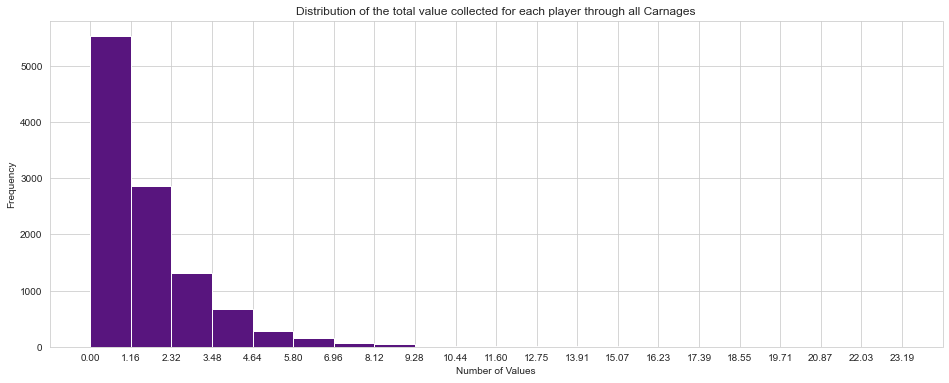

In [69]:
# Plotting the distribution of the total value collected for each player through all Carnages
count, bin_edges = np.histogram(df_copy['total_value_nfng'], 20)

# un-stacked histogram
df_copy['total_value_nfng'].plot(kind ='hist', 
                                  figsize=(16, 6),
                                  bins=20,
                                  xticks=bin_edges,
                                  color=['#58157e']
                                 )

plt.title('Distribution of the total value collected for each player through all Carnages')
plt.ylabel('Frequency')
plt.xlabel('Number of Values')

plt.show()

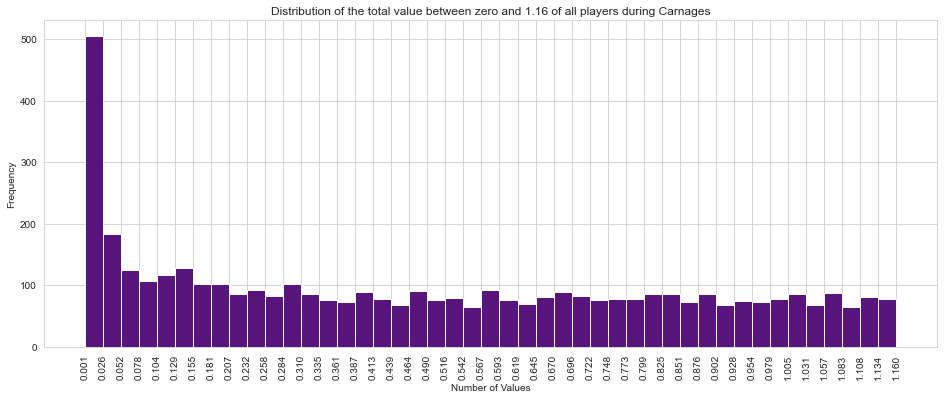

In [70]:
# Zoom In within the first bin: Identifying a threshold for the total value
zoom_in = df_copy[(df_copy['total_value_nfng']<1.16) & (df_copy['total_value_nfng']>0)]

count, bin_edges = np.histogram(zoom_in['total_value_nfng'], 45)

# un-stacked histogram
zoom_in['total_value_nfng'].plot(kind ='hist', 
                                 figsize=(16, 6),
                                 bins=45,
                                 xticks=bin_edges,
                                 color=['#58157e'],
                                 rot=90
                                 )

plt.title('Distribution of the total value between zero and 1.16 of all players during Carnages')
plt.ylabel('Frequency')
plt.xlabel('Number of Values')

plt.show()

We have a exponencial distribution for the total value of the players for the Carnage events, where we can identify a large amount of values in the first bin that range from 0 to 1.16. We zoomed-in to see the distribution between ]0,1.16] and there is a large number of "almost zero" that is contributing to have larger percentages change. What is the idea then? Marking players that have "almost zeros", so we can know how much of the players that we have categorized are really doing good.

In [71]:
## TESTING: GETTING PLAYERS WITH SMALL TOTAL VALUES
# 1./ calculate number of zeros that the player has
# 2./ calculate number of almost zeros the player has
# 3./ calculate number of small values with go from 0 to our threshold 0.026 *

threshold = 0.026

players_zeros = pd.DataFrame(columns=['username','n_zeros','n_almost_zeros','n_small_values']) 

players = df_copy['username'].unique().tolist()

for player in players:
    player_series = df_copy[df_copy['username']==player]['total_value_nfng']
    len_zeros_player = len(player_series[player_series.isin([0])])
    len_almost_zeros = len(player_series[(player_series < threshold) & (player_series > 0)])
    len_small_values = len(player_series[(player_series < threshold)])

    temp_df2 = pd.DataFrame(data={'username':[player],'n_zeros':[len_zeros_player],'n_almost_zeros':[len_almost_zeros],'n_small_values':[len_small_values]})
    players_zeros = pd.concat([players_zeros,temp_df2], ignore_index=True)

In [72]:
players_agg = pct_change_players.merge(players_zeros, on=['username'], how='inner', indicator=True)
players_agg['bn_zeros'] = players_agg['n_zeros'].apply(lambda x: doItBin(x))
players_agg['bn_almost_zeros'] = players_agg['n_almost_zeros'].apply(lambda x: doItBin(x))
players_agg['bn_small_values'] = players_agg['n_small_values'].apply(lambda x: doItBin(x))

In [73]:
players_agg2 = players_agg.groupby(['cat_pct_change','bn_small_values']).count().reset_index()[['cat_pct_change','bn_small_values','username']]
players_agg2 = players_agg2.pivot(index='cat_pct_change', columns='bn_small_values', values='username')

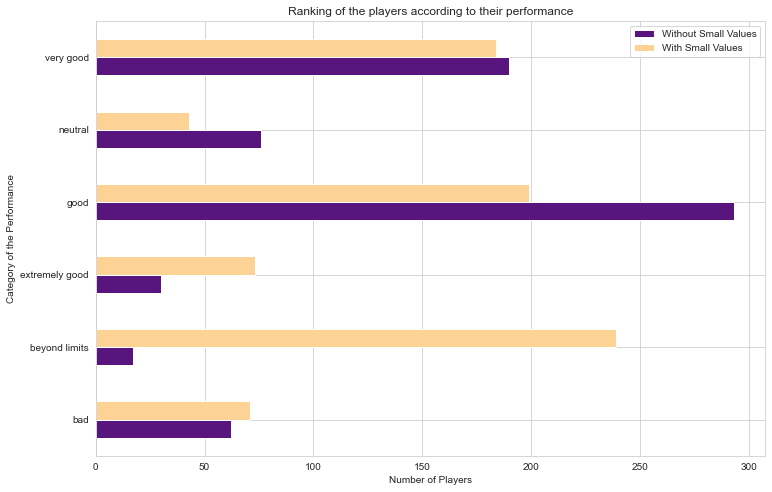

In [74]:
players_agg2.plot(kind='barh', figsize=(12, 8), color=['#58157e','#fdd295'])

plt.title('Ranking of the players according to their performance')
plt.ylabel('Category of the Performance')
plt.xlabel('Number of Players')

plt.legend(['Without Small Values','With Small Values'])

Now we can see that most of the beyond limits (players with a large percentage change) had small values that made them be in that category, and just a few of them are really beyond limits in term of performance. In contrast, for the category bad, we have that approximately 50% of who did bad have small values, which implies that even having small values, that can increase the average, they fall into that category. Beyond limits and Extremely good have the same characteristic with more small values that put them into that category. In conclusion, in all the categories that we made can fall players with small values that contribuited to have a large percentage change and at the same time contribuited positively to the average. In general, and just taking the purple part of the graph, we can say that players did good and very good, a second group did neutral and bad, and finally a third group did extremely good and beyond limits.

Work in progress...